In [ ]:
import numpy as np
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
import re
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [ ]:
path_to_data = "data/"
sample1 = pd.read_pickle(path_to_data + "sample1.pkl")

sample1.reset_index(inplace=True, drop=True)

In [ ]:
len(sample1)

3576

In [ ]:
for i in range(len(sample1["tweet"])):
    print(f"--- {i} ---")
    print(sample1["tweet"][i])
    print("************************")

--- 0 ---
#LetitiaWright est en trending topics en ce moment et pas pour parler de #BlackPanther ! L'actrice, qui joue le rôle de #Shuri, s'est mis Twitter à dos après avoir posté une vidéo #AntiVaxx (retirée depuis) et liké des Tweets pronant son remplacement dans Black Panther 2. https://t.co/PqNGLwYekO
************************
--- 1 ---
Ces semaines sans pouvoir aller à la #salledesport puis ces week-end sans pouvoir aller au #restaurant ça commence à être vraiment chiant... 
#confinement2 #StopDictatureSanitaire 
#StopDictatureMacroniste
************************
--- 2 ---
@SanofiFR Mais surtout remplir les poches des actionnaires !!!
#StopDictatureSanitaire
************************
--- 3 ---
@MarteauOlivier Je propose une solution : français, mettons un terme à cette #DictatureSanitaire , au regard de la létalité basse de ce virus : -1 On vaccine tous ceux qui le souhaite. 2-On met en place un traitement avec antiviraux pour soigner. 3- On supprime masques et rouvre tout
**********

In [ ]:
labels_dict = {
    0: "antivax or unclear",
    1: "provax",
    2: "unrelated",
    3: "not users or neutral",
    4: "not against vaccine but against gvt"
}

labels = [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 1, 0, 1, 4, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
          1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0,
          0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
          1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
          0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
          0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 4,
          0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
          0, 0, 0, 0, 0, 0, 4, 0, 1, 1, 0, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
          0, 0, 4, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1,
          0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
          1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 0, 1, 0,
          0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 1, 0, 0, 0,
          0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
          0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
          1, 4, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
          0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
          0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0,
          0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
          0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
          0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
          0, 0, 1, 1, 1, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
          1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          1, 0, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0, 3, 1, 1, 0, 1, 0, 0, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
          0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
          1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
          1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
          0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
          0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
          1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
          0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
          0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 2, 0, 2, 1, 1, 0, 1,
          0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
          0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
          1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
          0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
          1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
          0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
          0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
          1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
          0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
          0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
          0, 0, 0, 0, 0, 1, 4, 1, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 4, 0, 0, 0,
          0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 4, 1, 4, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 3, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
          0, 0, 4, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 3, 0, 0, 1, 0, 0,
          1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 4, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0,
          1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0]
len(labels)

3576

In [ ]:
sample1["labels"] = labels
sample1.head()

,author_id,created_at,retweet_count,reply_count,like_count,quote_count,lang,tweet,tweet_clean0,day,week,labels
0,1096512012648153088,2020-12-04 15:09:56+00:00,1,0,0,0,fr,#LetitiaWright est en trending topics en ce mo...,#LetitiaWright est en trending topics en ce mo...,2020-12-04 00:00:00+00:00,2020-11-30,2
1,793201116527882240,2020-12-05 14:26:54+00:00,0,0,0,0,fr,Ces semaines sans pouvoir aller à la #salledes...,Ces semaines sans pouvoir aller à la #salledes...,2020-12-05 00:00:00+00:00,2020-11-30,0
2,702627717687148544,2020-12-03 19:30:05+00:00,0,0,0,0,fr,@SanofiFR Mais surtout remplir les poches des ...,Mais surtout remplir les poches des actionnair...,2020-12-03 00:00:00+00:00,2020-11-30,0
3,3696598876,2020-12-02 11:41:05+00:00,0,0,2,0,fr,@MarteauOlivier Je propose une solution : fran...,"Je propose une solution : français, mettons un...",2020-12-02 00:00:00+00:00,2020-11-30,0
4,722105818489974787,2020-12-06 00:39:05+00:00,0,0,0,0,fr,"Du bon sens, tout simplement ! Sans parler des...","Du bon sens, tout simplement ! Sans parler des...",2020-12-06 00:00:00+00:00,2020-11-30,0


In [ ]:
# def clean(text):
#     #remove @ppl, url
#     output = re.sub(r'https://\S*','', text)
#     output = re.sub(r'@\S*','',output)

#     #remove \r, \n
#     rep = r'|'.join((r'\r',r'\n'))
#     output = re.sub(rep,'',output)

#     #remove duplicated punctuation
#     output = re.sub(r'([!()\-{};:,<>./?@#$%\^&*_~]){2,}', lambda x: x.group()[0], output)

#     #remove extra space
#     output = re.sub(r'\s+', ' ', output).strip()

#     #remove string if string only contains punctuation
#     if sum([i.isalpha() for i in output])== 0:
#         output = ''

#     #remove string if length<5
#     #if len(output.split()) < 5:
#     #    output = ''

#     return output

# df_rest = pd.read_pickle(path_to_data + "no_retweet_df.pkl")
# df_rest['tweet_clean0'] = df_rest['tweet'].apply(clean)
# df_rest.loc[df_rest['tweet_clean0'].str.contains('violates'), 'tweet_clean0'] = ''
# df_rest = df_rest[df_rest['tweet_clean0'] != '']

In [ ]:
# df_diff = df.merge(df_rest, indicator=True, how='outer')
# df_diff = df_diff[df_diff['_merge'] == 'right_only']

In [ ]:
path_to_data = "data/"
sample2 = pd.read_pickle(path_to_data + "sample2.pkl")
sample2.reset_index(inplace=True, drop=True)
len(sample2)

443

In [ ]:
for i in range(len(sample2["tweet"])):
    print(f"--- {i} ---")
    print(sample2["tweet"][i])
    print("************************")

--- 0 ---
@ElianeCarrier Qui ça ? 🤣😂 #StopDictatureSanitaire #stopconfinement #Présidentielle2022
************************
--- 1 ---
#antivax #menaces #NosBlousesBlanches n’acceptons jamais les menaces 
https://t.co/qpEfzE0ecT
************************
--- 2 ---
💥Voilà la #Macronie 🤮
#DictatureSanitaire #MortsEhpadsGVT #Confinement3
@CNEWS @LCI @BFMTV #TousContreMacronJour79  
@LaREM_AN #COVID19 @EmmanuelMacron https://t.co/AbT0OXYvYE
************************
--- 3 ---
@phdumont @JeanCASTEX #Castex 
#DictatureSanitaire 
#MacronDemission 
#Macronistan 

La réalité En Marche https://t.co/w5SpXTWIgB
************************
--- 4 ---
Mais où est #Macron?
#Macrotte #DictatureSanitaire https://t.co/wDCjQ2UNZb
************************
--- 5 ---
@nrenard75 @ChtiKiff69 Complètement Maurrasthénique le #Macron 
#DictatureSanitaire
************************
--- 6 ---
Réveillez-vous !
#StopDictatureSanitaire https://t.co/SBBMvF0V5y
************************
--- 7 ---
Le @gouvernementFR  voulait dire 

In [ ]:
labels_2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
            0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

len(labels_2)

443

In [ ]:
sample2["labels"] = labels_2
sample2.head()

,author_id,created_at,retweet_count,reply_count,like_count,quote_count,lang,tweet,tweet_clean0,day,week,_merge,labels
0,1228699668990906370,2020-12-02 14:38:09+00:00,0,0,0,0,fr,@ElianeCarrier Qui ça ? 🤣😂 #StopDictatureSanit...,Qui ça ? 🤣😂 #StopDictatureSanitaire #stopconfi...,NaT,2020-11-30,right_only,0
1,552494536,2020-12-07 10:15:27+00:00,5,1,16,0,fr,#antivax #menaces #NosBlousesBlanches n’accept...,#antivax #menaces #NosBlousesBlanches n’accept...,NaT,2020-12-07,right_only,0
2,800457506203963392,2020-12-16 15:33:13+00:00,0,0,0,0,fr,💥Voilà la #Macronie 🤮\n#DictatureSanitaire #Mo...,💥Voilà la #Macronie 🤮#DictatureSanitaire #Mort...,NaT,2020-12-14,right_only,0
3,806828978342424576,2020-12-22 19:08:01+00:00,0,0,0,0,fr,@phdumont @JeanCASTEX #Castex \n#DictatureSani...,#Castex #DictatureSanitaire #MacronDemission #...,NaT,2020-12-21,right_only,0
4,1294936872,2020-12-27 16:25:50+00:00,0,0,0,0,fr,Mais où est #Macron?\n#Macrotte #DictatureSani...,Mais où est #Macron?Macrotte #DictatureSanitaire,NaT,2020-12-21,right_only,0


In [ ]:
sample2["day"] = sample2["created_at"].dt.normalize()

In [ ]:
all_labeled_df = pd.concat([sample1, sample2], axis=0)
all_labeled_df.head()

,author_id,created_at,retweet_count,reply_count,like_count,quote_count,lang,tweet,tweet_clean0,day,week,labels,_merge
0,1096512012648153088,2020-12-04 15:09:56+00:00,1,0,0,0,fr,#LetitiaWright est en trending topics en ce mo...,#LetitiaWright est en trending topics en ce mo...,2020-12-04 00:00:00+00:00,2020-11-30,2,NaN
1,793201116527882240,2020-12-05 14:26:54+00:00,0,0,0,0,fr,Ces semaines sans pouvoir aller à la #salledes...,Ces semaines sans pouvoir aller à la #salledes...,2020-12-05 00:00:00+00:00,2020-11-30,0,NaN
2,702627717687148544,2020-12-03 19:30:05+00:00,0,0,0,0,fr,@SanofiFR Mais surtout remplir les poches des ...,Mais surtout remplir les poches des actionnair...,2020-12-03 00:00:00+00:00,2020-11-30,0,NaN
3,3696598876,2020-12-02 11:41:05+00:00,0,0,2,0,fr,@MarteauOlivier Je propose une solution : fran...,"Je propose une solution : français, mettons un...",2020-12-02 00:00:00+00:00,2020-11-30,0,NaN
4,722105818489974787,2020-12-06 00:39:05+00:00,0,0,0,0,fr,"Du bon sens, tout simplement ! Sans parler des...","Du bon sens, tout simplement ! Sans parler des...",2020-12-06 00:00:00+00:00,2020-11-30,0,NaN


In [ ]:
all_labeled_df.reset_index(drop=True, inplace=True)

In [ ]:
len(all_labeled_df)

4019

<Axes: xlabel='labels'>

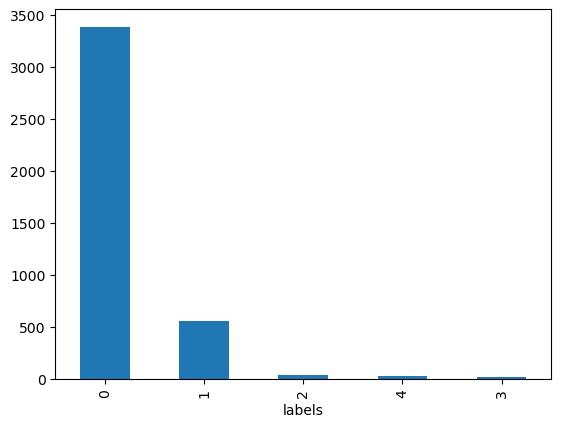

In [ ]:
all_labeled_df['labels'].value_counts().plot(kind='bar')

In [ ]:
all_labeled_df['labels'].value_counts()

labels
0    3395
1     558
2      25
4      22
3      19
Name: count, dtype: int64

In [ ]:
for i in range(len(all_labeled_df)):
    if all_labeled_df["labels"].iloc[i] == 4:
        print(i)
        print(all_labeled_df["tweet"].iloc[i])
        print("*************")

49
#DictatureSanitaire

Le vaccin chinois fonctionne puisque tout le monde revit là bas
*************
942
Chacun est libre de choisir s'il souhaite se faire ou non vacciné! Je ne suis en aucun cas un antivax mais contre le pass sanitaire #NonAuPassDeLaHonte
*************
951
@BFMTV C'est le propre des impuissants d'utiliser l'agressivité et la violence car ils n'ont pas d'arguments assez forts et les échappatoires, les contrevérités, les tromperies des #antivax sont bien la preuve de cette incapacité à trouver des solutions contre la #COVID19
*************
990
Non, tous les citoyens qui s'insugrent contre  l'#ObligationVaccinale ou le #PassSanitaire ne sont pas tous de furieux #antivax Le combat pour la liberté n'est pas un combat contre le vaccin, comme le rappellent fort justement @fxbellamy @gkierzek ou encore @lionnelluca06
*************
995
@BFMTV Les manifs c'est pas tous des #antivax mais des gens contre le #VaccinObligatoire et le #PassSanitaire, une #VaccinationObligatoire dég

In [ ]:
#Correcting the ones initially labelled as 2

all_labeled_df.at[19, "labels"] = 3
all_labeled_df.at[92, "labels"] = 0
all_labeled_df.at[103, "labels"] = 0
all_labeled_df.at[234, "labels"] = 0
all_labeled_df.at[263, "labels"] = 0
all_labeled_df.at[436, "labels"] = 0
all_labeled_df.at[460, "labels"] = 0
all_labeled_df.at[1129, "labels"] = 3
all_labeled_df.at[1144, "labels"] = 3
all_labeled_df.at[1315, "labels"] = 1
all_labeled_df.at[1338, "labels"] = 0
all_labeled_df.at[1382, "labels"] = 0
all_labeled_df.at[1401, "labels"] = 0
all_labeled_df.at[1512, "labels"] = 0
all_labeled_df.at[3427, "labels"] = 3
all_labeled_df.at[3872, "labels"] = 3


In [ ]:
#Correcting the ones initially labelled as 3

all_labeled_df.at[2738, "labels"] = 0

In [ ]:
#Correcting the ones initially labelled as 4

all_labeled_df.at[1080, "labels"] = 1

In [ ]:
labels_dict

{0: 'antivax or unclear',
 1: 'provax',
 2: 'unrelated',
 3: 'not users or neutral',
 4: 'not against vaccine but against gvt'}

In [ ]:
#Create only two classes with people against the vaccine or government measures against the vaccine and the rest
new_labels = [1 if x == 0 or x == 4 else 0 for x in list(all_labeled_df.labels)]
print(list(all_labeled_df.labels)[:40])
print(new_labels[:40])

[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
all_labeled_df["new_labels"] = new_labels

In [ ]:
all_labeled_df.to_pickle("data/manually_labelled_df.pkl")